# Exemplos úteis de numpy

Como o OpenCV usa o Numpy para guardar a imagem, é muito útil usar as funções dessa biblioteca.

"Masterizar" o Numpy vai dar um boost nas suas habilidades com imagens.

Encontrando o mínimo de um array


In [1]:
%matplotlib inline
import cv2
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.0.1 


## Invertendo os canais da imagem

Obtemos o mesmo efeito da conversão de BGR para RGB

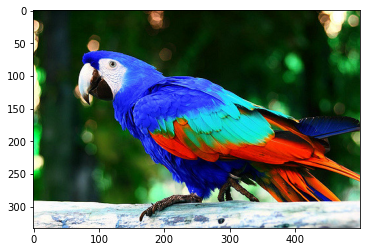

In [2]:
# Vamos ler a imagem da arara igual ao exemplo do notebook da última aula
arara = cv2.imread("arara_medium.jpg")

from matplotlib import pyplot as plt
plt.imshow(arara)
plt.show()

Podemos inverter os canais com o Numpy

In [3]:
arara_rgb = arara[:,:,::-1].copy()

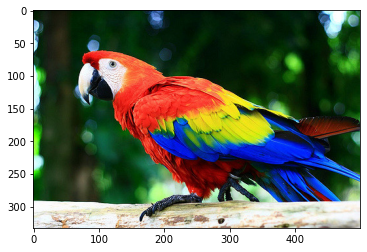

In [4]:
plt.imshow(arara_rgb)
plt.show()

## ROI - Region of Interest

- Determinação de uma região retangular na imagem que se quer processar, de fora que ela possua as características de interesse. 
- Uma ROI define uma sub-imagem da imagem original, com menos linhas e/cou colunas

Para a definição de uma ROI, é necessário estabelecer:
- A linha inicial (`miny`)
- A coluna inicial (`minx`)
- A linha final (`maxy`)
- A coluna final (`maxx`)

A imagem do OpenCV em Python é armazenada dentro de uma estrutura tipo `array` bidimensional (tons de cinza) ou tridimensional (colorida)do pacote `numpy`, que permite a definição de ROIs através do fatiamento (*slicing*) dos eixos do `array`. Dessa forma, recuperamos uma ROI através do acesso por chaves:

`roi = imagem[minyy:maxy, minx:maxx]`

**Atenção:** os limites `maxy` e `maxx`para a linha e coluna respectivamente não estão inclusos na ROI.
Além disso, o acesso às linhas e colunas da nova imagem devem obedecer novos índices, começando pela linha 0 e coluna 0. 


In [5]:
minx, miny = 50,50
maxx, maxy = 250,250

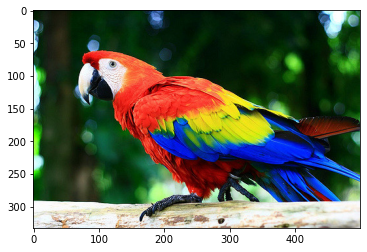

In [6]:
from matplotlib import pyplot as plt
plt.imshow(arara_rgb)
plt.show()

Agora vamos utilizar as variáveis para definir uma região, que marcaremos:

In [7]:
yellow_rgb = (255,255,0)
arara_rgb = cv2.rectangle(arara_rgb, (minx, miny), (maxx, maxy), yellow_rgb)

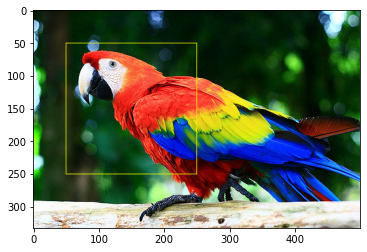

In [8]:
plt.imshow(arara_rgb)
plt.show()

Vamos agora usar os valores do retângulo para recortar a imagem:

In [9]:
recorte = arara_rgb[miny: maxy,minx: maxx]

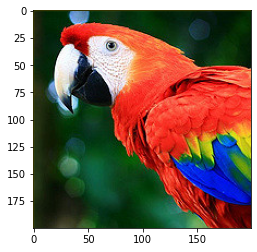

In [10]:
plt.imshow(recorte)
plt.show()

## Mínimo, máximo, média, etc

Com o Numpy é muito fácil tirar estatísticas da imagem.

Aqui vamos trabalhar com a imagem em tons de cinza, carregando a imagem nesse formato.

In [11]:
rintin_gray = cv2.imread("RinTinTin.jpg", cv2.IMREAD_GRAYSCALE)

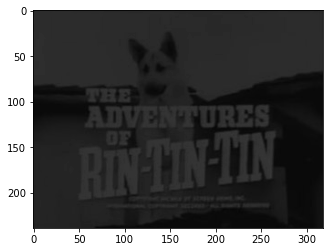

In [12]:
plt.imshow(rintin_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

As funções do Numpy que já eram usadas com arrays 1D continuam funcionando:

In [13]:
import numpy as np
minimo = np.min(rintin_gray)

In [14]:
maximo = np.max(rintin_gray)

In [15]:
media = np.mean(rintin_gray)

In [16]:
minimo, maximo, media

(7, 57, 33.6369174495408)

# Filtragem por valores

Na imagem do cão vamos transformar todos que têm valor acima da média em branco

In [17]:
gray = rintin_gray

Note que indexar o array por uma condicão *automaticamente seleciona todas as posições* em que a condição é válida

Vamos forçar quem está acima da média para branco (ou seja 255)

In [18]:
gray[gray > media] = 255

E quem está abaixo da média para preto:

In [19]:
gray[gray < media] = 0

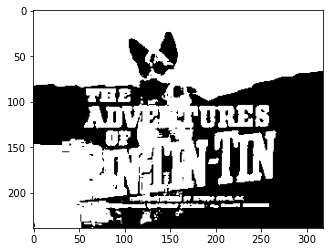

In [20]:
plt.imshow(rintin_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

# Achar os índices dos valores que atendem a uma certa condição:

Vamos achar o mínimo `x` e o mínimo `y` que têm pixel preto na imagem acima

In [21]:
results = np.where(gray==0)
results[0]

array([ 24,  24,  24, ..., 238, 238, 238], dtype=int64)

Primeiro temos um array de *linhas* e depois um array de colunas

In [22]:
i_linha = results[0]
i_linha

array([ 24,  24,  24, ..., 238, 238, 238], dtype=int64)

In [23]:
i_coluna = results[1]
i_coluna

array([146, 147, 148, ..., 315, 316, 317], dtype=int64)

Vamos encontrar a primeira linha que contém o pixel preto (menor `y`):

In [24]:
menor_linha = min(i_linha)
menor_linha

24

Note que a variável acima denota, dentre todas as posições que tinham pixel preto, qual a linha que veio primeiro.

Porém, para encontrar as colunas dos pixels pretos que estão na linha `menor_linha`, temos que identificar onde esse valor se encontra no vetor `i_linha`

In [25]:
indices = np.where(i_linha == menor_linha)[0]
indices

array([0, 1, 2, 3, 4], dtype=int64)

Desses índices, vamos escolher o menor 

In [26]:
indice_1 = min(indices)

Vamos desenhar um crosshair amarelo em cima da imagem em preto e branco, por isso precisamos convertê-las para uma imagem colorida primeiro

In [27]:
def crosshair(img, point, size, color):    
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)

In [28]:
rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

In [29]:
yellow_rgb = (255,255,0)
crosshair(rgb, (i_coluna[indice_1], i_linha[indice_1]), 5, yellow_rgb)

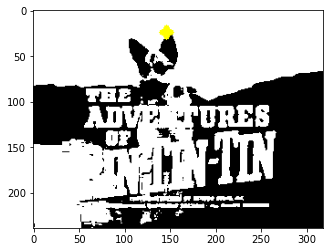

In [30]:
plt.imshow(rgb)
plt.show()

Agora é com você! Marque um crosshair na primeira coluna em que aparece um pixel preto. Dessa coluna, marque a linha mais acima.
O crosshair deve ir na posição $(x,y)=(0, 83)$